# Project: Investigate the relationship between SMS reminder and showing up at the appointment - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Missed clinical appointments, also known as **no-shows**, constitute a major challenge for health systems. No-shows result in ineffective consumption of goods and services, extended waiting times, and financial losses. This project seeks to examine a database of more than 110,000 clinical consultations in Brazil in order to identify patterns and discern factors affecting whether a patient appears for an appointment scheduled.
The end aim is to identify which traits most predict a no-show, which potentially can benefit appointment management and patient outreach efforts.


### Dataset Description


This data was obtained from Kaggle, initially provided by Joni Hoppen and Aquarela Analytics. It provides figures for 110,527 doctor's appointments within various neighborhoods of Brazil, concerning whether the patient attended an appointment or not.
There is a primary table of 14 columns, with each column covering a feature for either the appointment or patient, including the following: PatientId, AppointmentID, Gender, ScheduledDay,AppointmentDay, Age, Neighbourhood, Scholarship, Hipertension,Diabetes, Alcoholism, Handcap, SMS received, and No show.


### Question(s) for Analysis

This project examines factors determining whether a patient appears for their health appointment or does not. Each patient's demographic and behavior data and a target column named No-show, indicating whether they did or did not make their appointment, constitute this dataset.

The primary question that will be addressed in the investigation is:
**What factors are most influential in predicting if a patient will miss their appointment?**
To determin the nature of this relationship of factors that leed to missing the appointment,  analysing the following independent variables in relation to the dependent variable (No-show):

**SMS_received** – Does receiving a reminder message reduce the chance of missing an appointment?

**Age** – Do older or younger patients tend to miss more appointments?

**Scholarship** – Does enrollment in the Bolsa Família program affect show-up behavior?

Additionally, the following factor will be considered:

**waiting_days** (difference between ScheduledDay and AppointmentDay) – Does waiting longer lead to more no-shows?

Through this analysis, the goal is to uncover patterns that could help clinics better anticipate missed appointments and take preventive measures.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv('/content/drive/MyDrive/Udacity/First Project/Medical_Appointment_No_Shows.csv')
df.info()
df.describe()
df.columns
# count missing values:
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0



### Data Cleaning


In [13]:
# rename the columns
df.rename(columns={
    'No-show': 'No_show',
    'Handcap': 'Handicap',
    'ScheduledDay': 'Scheduled_Day',
    'AppointmentDay': 'Appointment_Day'
}, inplace=True)

#convert to datetime
df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

#check if there is any dublicates and drop them
df.duplicated().sum()
df.drop_duplicates(inplace=True)

#Check for invalid ages and remove them
df[df['Age'] < 0]
df = df[df['Age'] >= 0]


###Exploratory Data Analysis

In this section, we explore several factors that may influence whether a patient shows up for their appointment. The focus will be on analyzing:

1-SMS_received

2-Age

3-Scholarship

4-waiting_days (created to measure the time gap between booking and appointment. Negative values were removed.)

####Distributting the Data before Reaserching

In [23]:
# Create new column for number of days between scheduling and appointment
df['waiting_days'] = (df['Appointment_Day'] - df['Scheduled_Day']).dt.days

# Remove any rows with negative waiting days (data entry errors)
df = df[df['waiting_days'] >= 0]

Text(0, 0.5, 'Proportion')

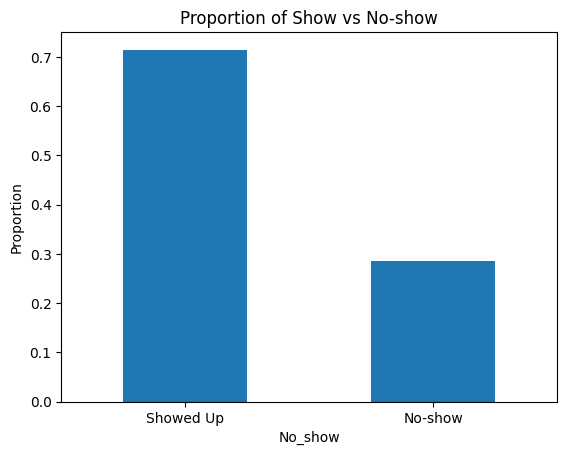

In [24]:
# Overall distribution of attendance
df['No_show'].value_counts(normalize=True).plot(kind='bar', title='Proportion of Show vs No-show', rot=0)
plt.xticks([0, 1], ['Showed Up', 'No-show'])
plt.ylabel('Proportion')

based on destribution above it was displayed that around 20% of patients missed their appointments.

###Research Age and No-show Rate relationship

In [27]:
def plot_show_vs_noshow(column_name, title):
    """
    Plots the count of patients who showed up vs those who didn't,
    grouped by a specified column.
    """
    show = df[df['No_show'] == 'No'][column_name].value_counts().sort_index()
    no_show = df[df['No_show'] == 'Yes'][column_name].value_counts().sort_index()

    index = sorted(set(show.index).union(no_show.index))
    show = show.reindex(index, fill_value=0)
    no_show = no_show.reindex(index, fill_value=0)

    width = 0.35
    ind = np.arange(len(index))
    plt.figure(figsize=(8, 5))
    plt.bar(ind, show.values, width, label='Showed up')
    plt.bar(ind + width, no_show.values, width, label='No-show')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(ind + width / 2, index)
    plt.legend()
    plt.show()

Text(0, 0.5, 'Number of Patients')

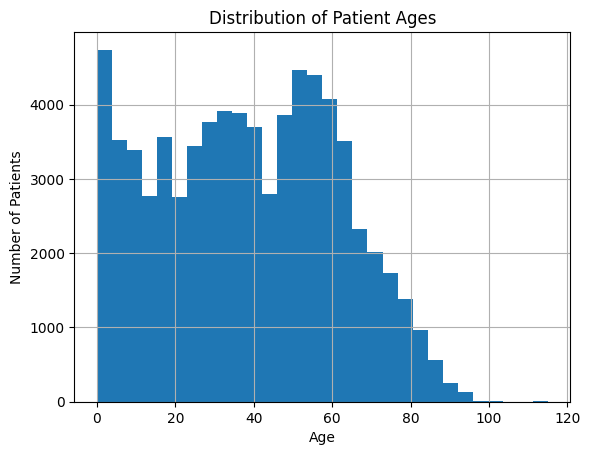

In [34]:
#Age Distribution
df['Age'].hist(bins=30)
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

as displayed above we can say that most patients are adults, with a notable number of elderly and children.

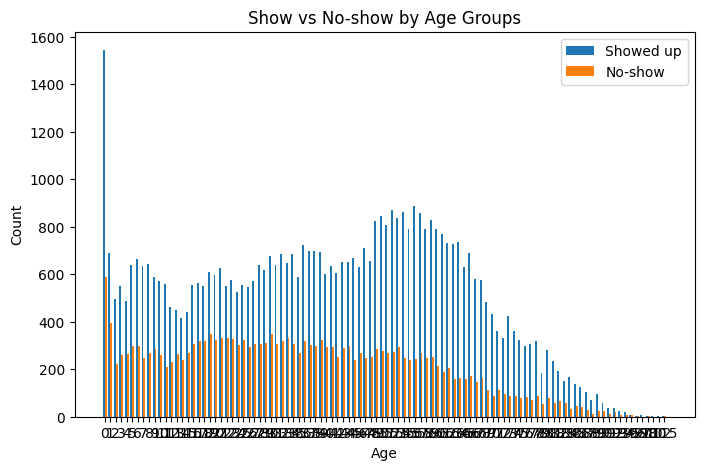

In [28]:
#Finding relationship between Age and No-show Rate
plot_show_vs_noshow('Age', 'Show vs No-show by Age Groups')

based on the above plot we can see that Younger patients appear to have a higher no-show rate, with better attendance among older age groups.

### Research The Relationship between receving an SMS and No-Show

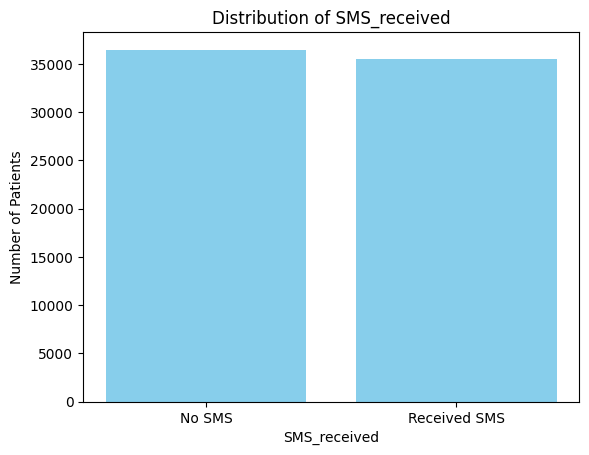

In [29]:
# Explore SMS_received variable - how many patients received an SMS
sms_counts = df['SMS_received'].value_counts().sort_index()
plt.bar(sms_counts.index, sms_counts.values, color='skyblue')
plt.xticks([0, 1], ['No SMS', 'Received SMS'])
plt.title('Distribution of SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Number of Patients')
plt.show()


We can see that the number of patients received SMS are slitly lower than the ones who did not.

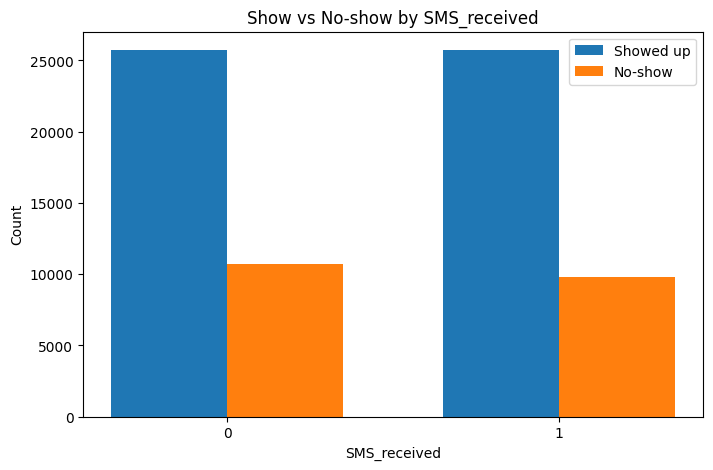

In [30]:
# Analyze attendance based on SMS reminders
plot_show_vs_noshow('SMS_received', 'Show vs No-show by SMS_received')

patients who received an SMS still missed their appointments at a higher rate than those who didn’t.

###Research Scholarship and No-show relationship

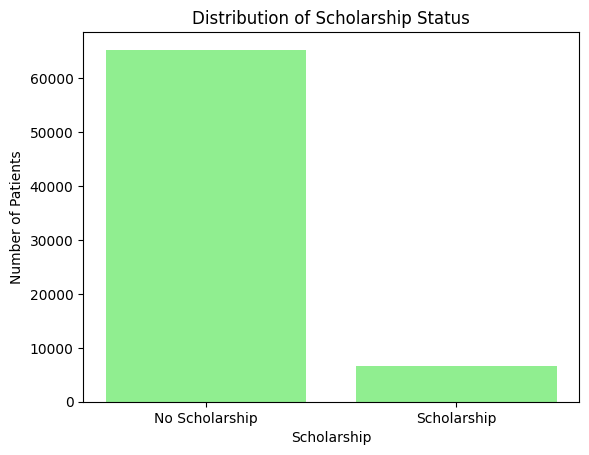

In [31]:
# Explore Scholarship variable - how many patients are on scholarship
scholarship_counts = df['Scholarship'].value_counts().sort_index()
plt.bar(scholarship_counts.index, scholarship_counts.values, color='lightgreen')
plt.xticks([0, 1], ['No Scholarship', 'Scholarship'])
plt.title('Distribution of Scholarship Status')
plt.xlabel('Scholarship')
plt.ylabel('Number of Patients')
plt.show()


based on the data set we can see that the number of patients who where accepted into the scholarship were significantly lower than the patients who did not.

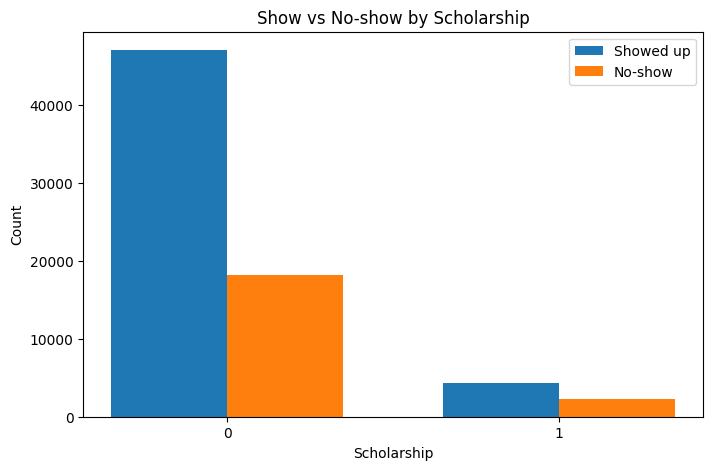

In [25]:
#Finding relationship between Scholarship and No-show
plot_show_vs_noshow('Scholarship', 'Show vs No-show by Scholarship')

Patients enrolled in the Bolsa Família program had slightly higher no-show rates.

###Research Waiting Days and No-show relationship

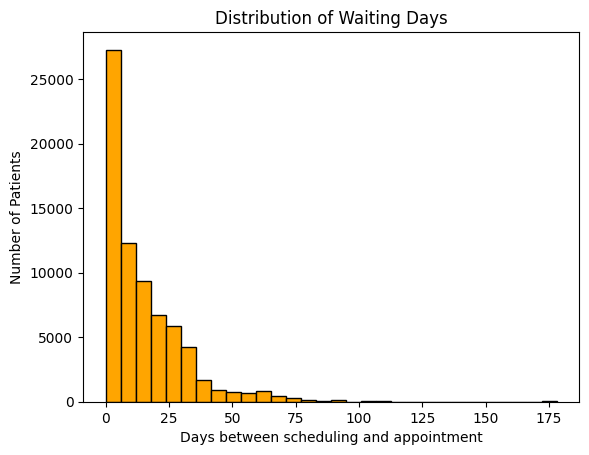

In [33]:
# Explore Waiting Days distribution
plt.hist(df['waiting_days'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Waiting Days')
plt.xlabel('Days between scheduling and appointment')
plt.ylabel('Number of Patients')
plt.show()


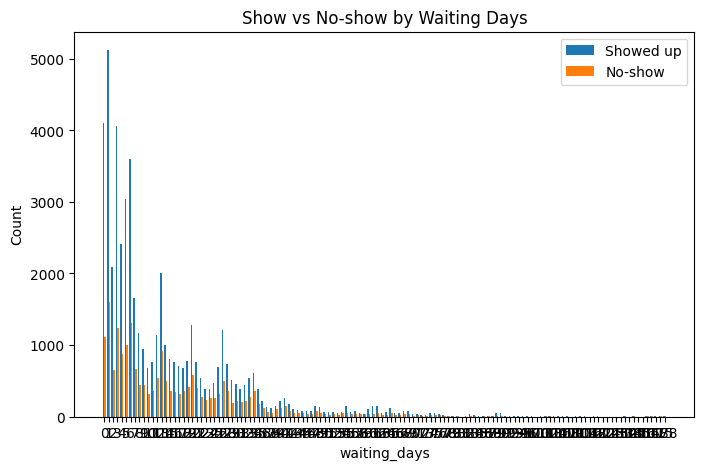

In [26]:
#Finding relationship between Waiting Days and No-show
plot_show_vs_noshow('waiting_days', 'Show vs No-show by Waiting Days')

Longer wait times appear to increase the no-show rate, especially after 20+ days.

##Conclusions

This study investigated factors a patient is likely to take into account when deciding to appear for an arranged clinical appointment in Brazil. It examined the following factors: receipt of an SMS reminder, age, Bolsa Família scholarship scheme enrollment, and waiting time from appointment scheduling to appointment day.


###Findings:
Young patients were more likely to miss appointments. Older patients (particularly those who were above 50 years) had improved attendance.

Unexpectedly, patients whose appointment was reminded by SMS had slightly higher no-show rates than patients without reminders. This could potentially result from confounding factors (e.g., reminder targeting unreliable patients in the past), and would warrant more extensive study.

Scholarship: Patients on the scholarship program had a slightly higher no-show rate, which may have been due to socioeconomic factors like access to transportation or job flexibility.

Waiting time: An extended waiting time from scheduling to appointment time is also associated with a higher no-show ratio. Appointments scheduled 15-20 days and beyond were increasingly likely to result in no-shows.


###Limitations
No statistical testing was performed, so while patterns were observed, we cannot draw causal conclusions—only correlations.

The No_show column may have limitations in clarity due to its labeling ("Yes" meaning a missed appointment), which could lead to confusion if not handled carefully.

We do not know the exact reasons behind no-shows—factors such as transportation availability, health severity, or weather conditions are not captured in this dataset.